### Small lung cancer data analysis

In [30]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data2_python = pd.read_csv("/Users/sisiphozinja/Documents/GitHub/cell-translation/data/tracerX.csv")

# Display the first few rows to verify
print(data2_python.head())

    cruk_id tumour_id_muttable_cruk tumour_id_per_patient  age     sex  \
0  CRUK0034                CRUK0034              CRUK0034   68  Female   
1  CRUK0150                CRUK0150              CRUK0150   81    Male   
2  CRUK0159                CRUK0159              CRUK0159   60    Male   
3  CRUK0090                CRUK0090              CRUK0090   65    Male   
4  CRUK0045                CRUK0045              CRUK0045   85    Male   

        ethnicity  cigs_perday  years_smoking  packyears  \
0    White- Irish         20.0             35     35.000   
1  White- British         44.5             49    109.025   
2  White- British         20.0             38     38.000   
3  White- British         10.0             35     17.500   
4  White- British         10.0             25     12.500   

  smoking_status_merged  ...  os_time  cens_dfs dfs_time cens_dfs_any_event  \
0             Ex-Smoker  ...     1849         0     1849                  0   
1             Ex-Smoker  ...     136

### Step 1: Data Preparation and Feature Engineering

In [ ]:
%pip install requests

In [ ]:
import os
import requests

# Configuration
record_id = "7822002"
output_dir = "clinical_data"
os.makedirs(output_dir, exist_ok=True)

# Zenodo API endpoint
api_url = f"https://zenodo.org/api/records/{record_id}"

# Fetch metadata using Zenodo API
response = requests.get(api_url)
response.raise_for_status()  # Raises exception if error
data = response.json()

# Download all files
for file in data["files"]:
    file_url = file["links"]["self"]
    filename = file["key"]
    print(f"Downloading {filename}...")
    file_response = requests.get(file_url)
    file_response.raise_for_status()
    
    file_path = os.path.join(output_dir, filename)
    with open(file_path, "wb") as f:
        f.write(file_response.content)
    print(f"Saved to {file_path}")


In [ ]:
import zipfile
import os

zip_path = "clinical_data/figurecode.zip"
extract_dir = "clinical_data"

# Check if the zip file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"Zip file not found: {zip_path}")

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print(f"Extracted all files to {extract_dir}")

In [ ]:
%pip install Bio

In [ ]:
%pip install biopython
%pip install pyreadr

### Data:
>__*trees_df:*__ Information on lineage trees per patient (e.g., clone structure).
>
>__*clinical_df:*__ Clinical metadata (e.g., patient ID, cancer type, diagnosis info).
>
>__*mapping_df:*__ Links between samples and patients or studies.
>
>__*samples_df:*__ Details on sample acquisition, purity, timepoints, etc.

In [31]:
import os

output_dir = "clinical_data"
os.makedirs(output_dir, exist_ok=True)

# Verify the current working directory
print(f"Current working directory: {os.getcwd()}")

Current working directory: /Users/sisiphozinja/Documents/GitHub/cell-translation


In [32]:
import pandas as pd
import os

# All phylogentic tree names 
phylogenetic_tree_names_path = "clinical_data/figurecode/data/phylogenetic_trees/phylogenetic_tree_names.csv"
# Load the phylogenetic tree names into a pandas DataFrame
phylogenetic_tree_names = pd.read_csv(phylogenetic_tree_names_path)
# Display the first few rows to verify
print(phylogenetic_tree_names.head())

          x
0  CRUK0005
1  CRUK0057
2  CRUK0039
3  CRUK0196
4  CRUK0023


In [33]:
# Taking a closer look at how many tables (i.e., data frames) each patient/tree contains in the 202211109 TRACERX421 phylogenetic trees (i.e., tree_obj list)
phylogenetic_trees_summary = "clinical_data/figurecode/data/table_summary.csv"

# Load the CSV
table_summary_df = pd.read_csv(phylogenetic_trees_summary)

# Preview
print(table_summary_df.head())

  tumour_id  table_count              table_names
0  CRUK0005            1  ccf_table_pyclone_clean
1  CRUK0057            1  ccf_table_pyclone_clean
2  CRUK0039            1  ccf_table_pyclone_clean
3  CRUK0196            1  ccf_table_pyclone_clean
4  CRUK0023            1  ccf_table_pyclone_clean


In [34]:
# Create a list of dictionaries with tumour_id, table_count, and table_names for each patient/tumour ID
table_summary = [
    {
        "tumour_id": row["tumour_id"],
        "table_count": row["table_count"],
        "table_names": [name.strip() for name in str(row.get("table_names", "")).split(";") if name.strip()]
    }
    for _, row in table_summary_df.iterrows()
]

# Display the summary
for entry in table_summary:
    print(f"Tumour ID: {entry['tumour_id']}, Table Count: {entry['table_count']}, Table Names: {entry['table_names']}")

Tumour ID: CRUK0005, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0057, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0039, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0196, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0023, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0050, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0073, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0038, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0010, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0013, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0011, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0014, Table Count: 1, Table Names: ['ccf_table_pyclone_clean']
Tumour ID: CRUK0279, Table Count: 1, Table Names: ['ccf_table_py

> What does this mean exactly? Each tumor has one child-table of CCF pyclone data. 
> - What information can we extract from that table? 
> - How useful is this information in helping us predict tumor evolution?

## Background on Pyclone

>### **What is PyClone?**
>- PyClone helps us figure out the different groups of cancer cells in a tumor by analyzing mutations, even when the data is messy. It does this using **Bayesian clustering** and has been shown to work well when tested on real single-cell data.
>- It also estimates how many cells in the tumor belong to each clone (cellular prevalence).

>### **Identifying mutation subclonal clusters and reconstructing tumour phylogenetic trees: https://pmc.ncbi.nlm.nih.gov/articles/PMC10115649/#Sec9**
>To reconstruct tumour phylogenetic trees of each tumour from the identified somatic mutations, we developed a new computational method called CONIPHER11 (correcting noise in phylogenetic evaluation and reconstruction) to address three key challenges in phylogenetic reconstruction: (1) scaling to a high number of primary tumour and metastasis regions per patient; (2) correcting for complex evolutionary events, including mutation losses25; (3) removing biologically improbable clusters that are either driven by subclonal copy number or are not biologically compatible with the inferred evolutionary tree. CONIPHER includes three key steps, which we describe in brief below. We report the full details in a companion paper11.

In [ ]:
# Preview of the CCF table for patient CRUK0005
# Load data
ccf_table_0005 = pd.read_csv("clinical_data/figurecode/data/CRUK0005_ccf_table.csv")

# Display the first few rows to verify
print(ccf_table_0005.head())

   CRUK0005_SU_T1.R1_cov  CRUK0005_SU_T1.R2_cov  CRUK0005_SU_T1.R3_cov  \
0                    508                    460                    576   
1                    283                    202                    360   
2                    171                    119                    200   
3                    288                    178                    294   
4                    452                    444                    457   

   CRUK0005_SU_T1.R4_cov  CRUK0005_SU_T1.R1_var_count  \
0                    413                            0   
1                    189                            0   
2                    123                           27   
3                    167                            0   
4                    378                           23   

   CRUK0005_SU_T1.R2_var_count  CRUK0005_SU_T1.R3_var_count  \
0                            0                           70   
1                           17                            0   
2                      

In [44]:
print(ccf_table_0005.columns.tolist())

['CRUK0005_SU_T1.R1_cov', 'CRUK0005_SU_T1.R2_cov', 'CRUK0005_SU_T1.R3_cov', 'CRUK0005_SU_T1.R4_cov', 'CRUK0005_SU_T1.R1_var_count', 'CRUK0005_SU_T1.R2_var_count', 'CRUK0005_SU_T1.R3_var_count', 'CRUK0005_SU_T1.R4_var_count', 'CRUK0005_SU_T1.R1_VAF', 'CRUK0005_SU_T1.R2_VAF', 'CRUK0005_SU_T1.R3_VAF', 'CRUK0005_SU_T1.R4_VAF', 'CRUK0005_SU_T1.R1_PhyloCCF', 'CRUK0005_SU_T1.R2_PhyloCCF', 'CRUK0005_SU_T1.R3_PhyloCCF', 'CRUK0005_SU_T1.R4_PhyloCCF', 'CRUK0005_SU_T1.R1_PycloneCCF', 'CRUK0005_SU_T1.R2_PycloneCCF', 'CRUK0005_SU_T1.R3_PycloneCCF', 'CRUK0005_SU_T1.R4_PycloneCCF', 'CRUK0005_SU_T1.R1_Pyclone_0.05', 'CRUK0005_SU_T1.R2_Pyclone_0.05', 'CRUK0005_SU_T1.R3_Pyclone_0.05', 'CRUK0005_SU_T1.R4_Pyclone_0.05', 'CRUK0005_SU_T1.R1_Pyclone_0.95', 'CRUK0005_SU_T1.R2_Pyclone_0.95', 'CRUK0005_SU_T1.R3_Pyclone_0.95', 'CRUK0005_SU_T1.R4_Pyclone_0.95', 'CRUK0005_SU_T1.R1_cpn.copies', 'CRUK0005_SU_T1.R2_cpn.copies', 'CRUK0005_SU_T1.R3_cpn.copies', 'CRUK0005_SU_T1.R4_cpn.copies', 'CRUK0005_SU_T1.R1_mut.cpn.

>#### CCF-related columns are:
>'CRUK0005_SU_T1.R1_PycloneCCF',
'CRUK0005_SU_T1.R2_PycloneCCF',
'CRUK0005_SU_T1.R3_PycloneCCF',
'CRUK0005_SU_T1.R4_PycloneCCF'


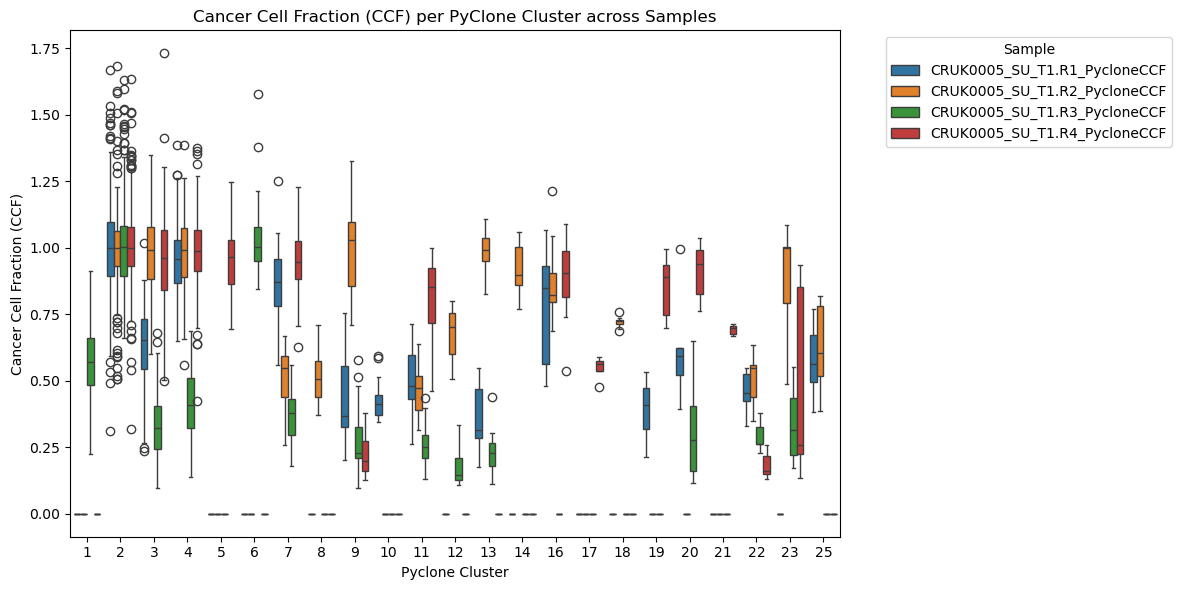

In [41]:
# Visualizing PyClone CCF per Cluster across Samples
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your full PyClone CCF table
df = pd.read_csv("clinical_data/figurecode/data/CRUK0005_ccf_table.csv")

# Select only the CCF columns (those containing "PycloneCCF")
ccf_cols = [col for col in df.columns if "PycloneCCF" in col]

# Create a DataFrame for plotting: Cluster + CCFs
df_ccf = df[["PycloneCluster"] + ccf_cols]

# Melt into long format for seaborn plotting
df_long = df_ccf.melt(id_vars="PycloneCluster", var_name="Sample", value_name="CCF")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="PycloneCluster", y="CCF", hue="Sample")

# Label and format
plt.title("Cancer Cell Fraction (CCF) per PyClone Cluster across Samples")
plt.xlabel("Pyclone Cluster")
plt.ylabel("Cancer Cell Fraction (CCF)")
plt.legend(title="Sample", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()
